In [3]:
import pycbc
import gwpy
import numpy as np
import matplotlib.pyplot as plt

from numpy import random
from gwpy.timeseries import TimeSeries
from gwpy.frequencyseries import FrequencySeries


/home/vboxuser/miniforge3/lib/python3.10/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal
PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [2]:
H1_1data = TimeSeries.read('H1_TEST1.hdf')
print(H1_1data)
pH1_1data = H1_1data.to_pycbc() #convert to pycbc TimeSeries
print(pH1_1data)

TimeSeries([2.53567919e-21, 1.18872265e-20, 2.72576599e-21, ...,
            2.63977026e-20, 8.27884215e-21, 3.20472696e-20]
           unit: dimensionless,
           t0: 0.0 s,
           dt: 0.00048828125 s,
           name: Strain,
           channel: H1:FAKE_2048)
[2.53567919e-21 1.18872265e-20 2.72576599e-21 ... 2.63977026e-20
 8.27884215e-21 3.20472696e-20]


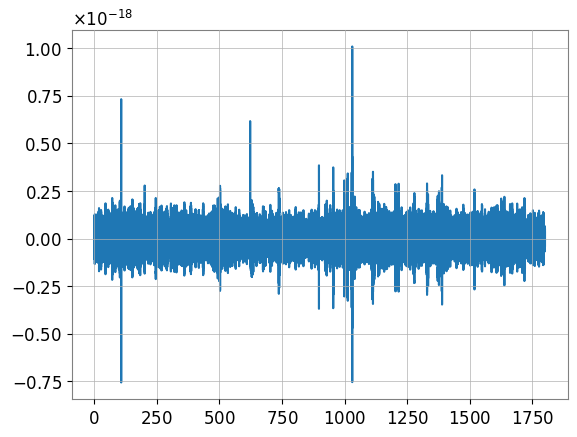

In [3]:
plot = pH1_1data.plot()

In [4]:
fft = H1_1data.fft()
print(fft)

FrequencySeries([-8.10534764e-26+0.00000000e+00j,
                  1.69680542e-25-1.26611478e-26j,
                 -6.75692841e-26+1.99813017e-25j, ...,
                  5.52829323e-26+1.93801350e-25j,
                 -4.75715362e-26+3.70240820e-26j,
                 -1.09455258e-25+0.00000000e+00j]
                unit: dimensionless,
                f0: 0.0 Hz,
                df: 0.0005555555555555556 Hz,
                epoch: 0.0,
                name: Strain,
                channel: H1:FAKE_2048)


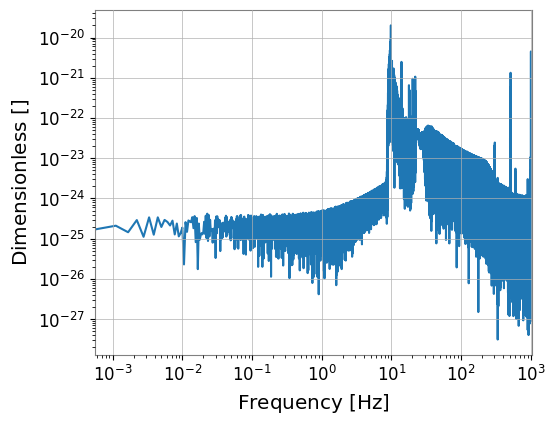

In [5]:
plot = fft.abs().plot(xscale="log", yscale="log")
plot.show(warn=False)

In [6]:
from scipy.signal import get_window

window = get_window('hann', H1_1data.size)
H1_1win = H1_1data * window

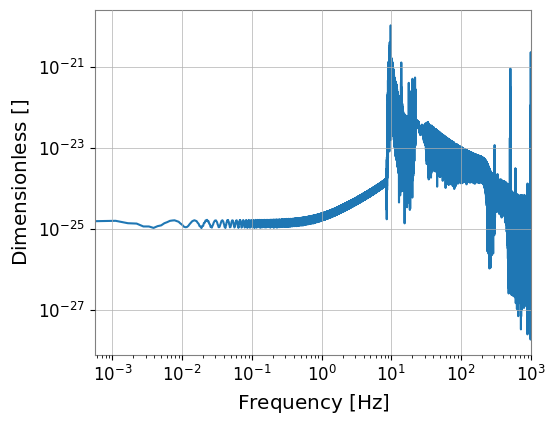

In [7]:
fftamp = H1_1win.fft().abs()
plot = fftamp.plot(xscale="log", yscale="log")
plot.show(warn=False)

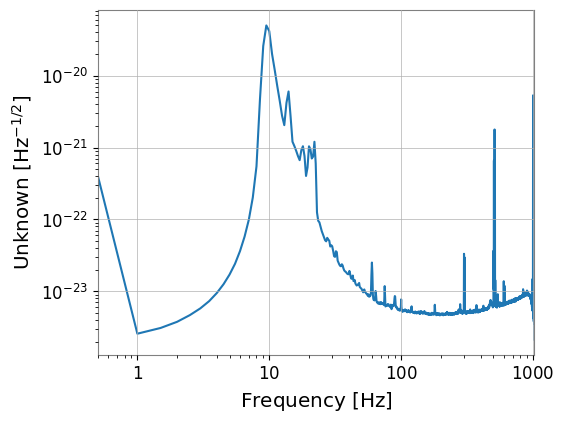

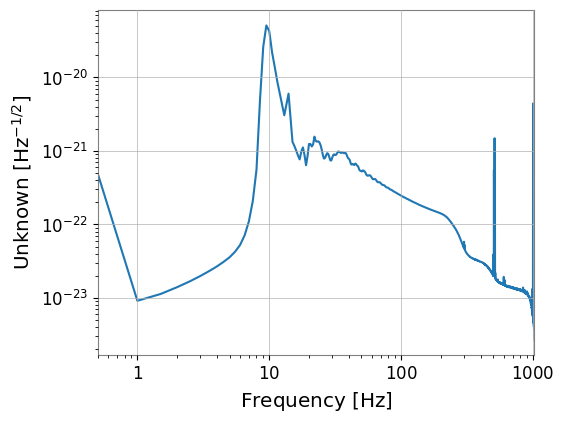

In [8]:
hasd = H1_1data.asd(fftlength=2, method="median")
plot = hasd.plot()
plot.show(warn=False)

hasd = H1_1data.asd(fftlength=2, method="welch")
plot = hasd.plot()
plot.show(warn=False)

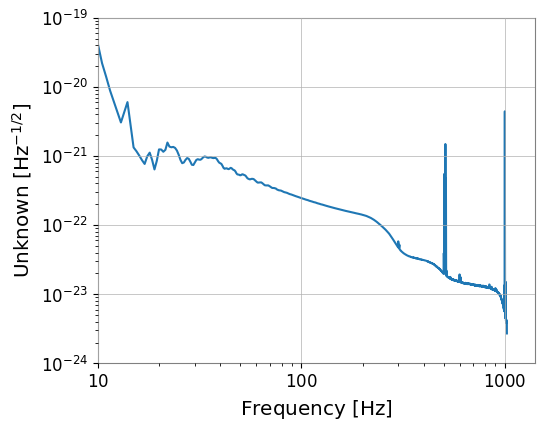

In [9]:
ax = plot.gca()
ax.set(xlim=(10, 1400), ylim=(1e-24, 1e-19))
plot

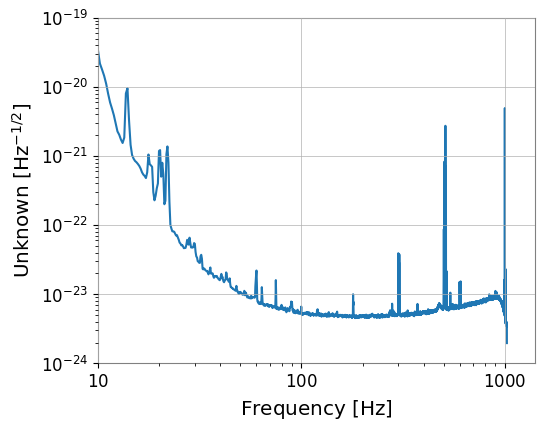

In [5]:
H1_2data = TimeSeries.read('H1_TEST2.hdf')
hasd2 = H1_2data.asd(fftlength=4, method="median")
plot = hasd2.plot()
ax = plot.gca()
ax.set_xlim(10, 1400)
ax.set_ylim(1e-24, 1e-19)
plot.show(warn=False)


TimeSeries([2.53567919e-21, 1.18872265e-20, 2.72576599e-21, ...,
            3.59246579e-20, 5.00180678e-20, 3.83926840e-20]
           unit: dimensionless,
           t0: 0.0 s,
           dt: 0.00048828125 s,
           name: Strain,
           channel: H1:FAKE_2048)
TimeSeries([8.39280388e-20, 9.33473353e-20, 9.51229707e-20, ...,
            5.81279059e-20, 5.30184716e-20, 5.79531458e-20]
           unit: dimensionless,
           t0: 3600.0 s,
           dt: 0.00048828125 s,
           name: Strain,
           channel: H1:FAKE_2048)
TimeSeries([-5.80795230e-20, -6.16743095e-20, -5.52853693e-20,
            ..., -3.89461034e-20, -3.45134549e-20,
            -3.87531074e-20]
           unit: dimensionless,
           t0: 6800.0 s,
           dt: 0.00048828125 s,
           name: Strain,
           channel: H1:FAKE_2048)
TimeSeries([-1.12213430e-18, -1.12956051e-18, -1.13501409e-18,
            ...,  1.42415077e-19,  1.34382787e-19,
             1.26663931e-19]
           unit: dimens

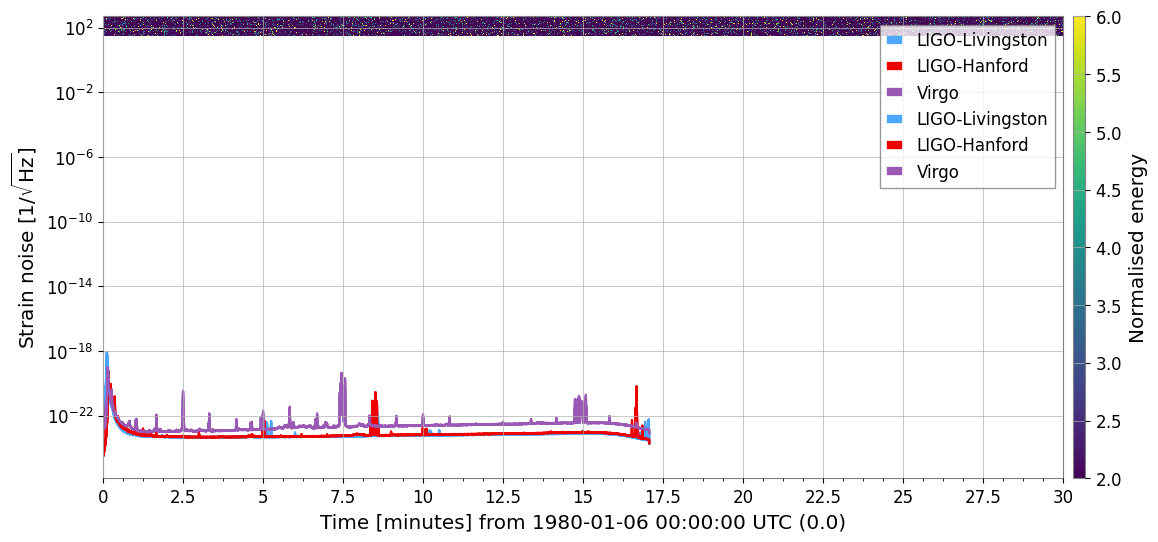

In [14]:
# get Hanford data
H1_1data = TimeSeries.read('H1_TEST1.hdf')
print(H1_1data.crop(0, 10))
hasd1 = H1_1data.asd(fftlength=4, method="median")

H1_2data = TimeSeries.read('H1_TEST2.hdf')
print(H1_2data)
hasd2 = H1_2data.asd(fftlength=4, method="median")

H1_3data = TimeSeries.read('H1_TEST3.hdf')
print(H1_3data)
hasd3 = H1_3data.asd(fftlength=4, method="median")

# get Livingston data
L1_1data = TimeSeries.read('L1_TEST1.hdf')
print(L1_1data)
lasd1 = L1_1data.asd(fftlength=4, method="median")

L1_2data = TimeSeries.read('L1_TEST2.hdf')
print(L1_2data)
lasd2 = L1_2data.asd(fftlength=4, method="median")

L1_3data = TimeSeries.read('L1_TEST3.hdf')
print(L1_3data)
lasd3 = L1_3data.asd(fftlength=4, method="median")

# get Virgo data
V1_1data = TimeSeries.read('V1_TEST1.hdf')
print(V1_1data)
vasd1 = V1_1data.asd(fftlength=4, method="median")

V1_2data = TimeSeries.read('V1_TEST2.hdf')
print(V1_2data)
vasd2 = V1_2data.asd(fftlength=4, method="median")

V1_3data = TimeSeries.read('V1_TEST3.hdf')
print(V1_3data)
vasd3 = V1_3data.asd(fftlength=4, method="median")

# and plot using standard colours
ax.plot(lasd1 ,label='LIGO-Livingston', color='gwpy:ligo-livingston')
ax.plot(lasd2 ,color='gwpy:ligo-livingston')
ax.plot(lasd3 ,color='gwpy:ligo-livingston')

ax.plot(hasd1, label='LIGO-Hanford', color='gwpy:ligo-hanford')
ax.plot(hasd2, color='gwpy:ligo-hanford')
ax.plot(hasd3, color='gwpy:ligo-hanford')

ax.plot(vasd1, label='Virgo', color='gwpy:virgo')
ax.plot(vasd2, color='gwpy:virgo')
ax.plot(vasd3, color='gwpy:virgo')


# # update the Livingston line to use standard colour, and have a label
# lline = ax.lines[0]
# lline.set_color('gwpy:ligo-livingston')  # change colour of Livingston data
# lline.set_label('LIGO-Livingston')

ax.set_ylabel(r'Strain noise [$1/\sqrt{\mathrm{Hz}}$]')
ax.legend()
plot

5.048849627591773e-26 1 / Hz(1/2) 1.0809589786744399e-19 1 / Hz(1/2)


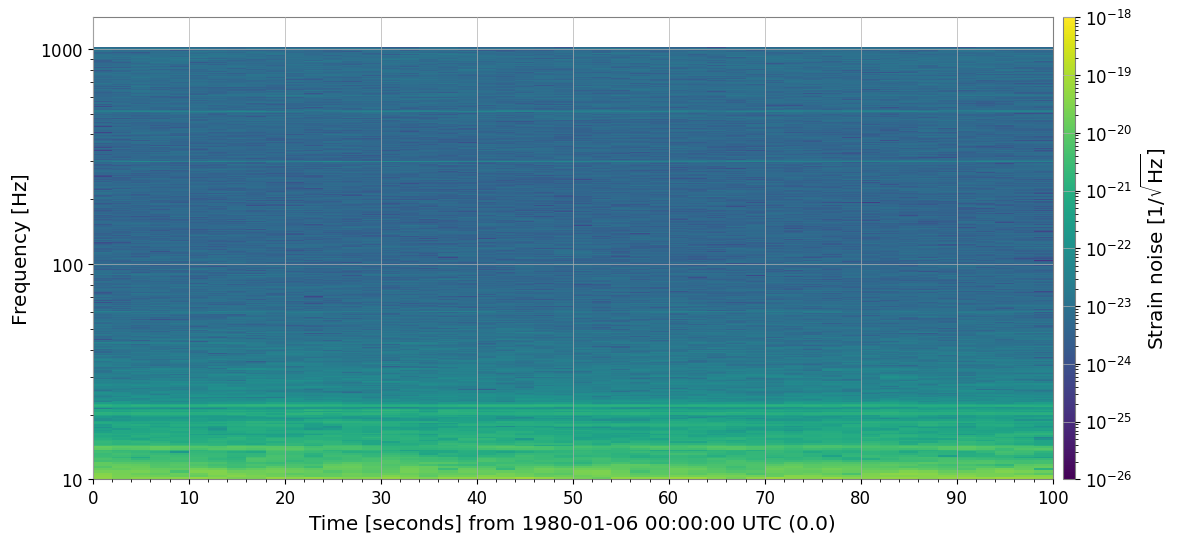

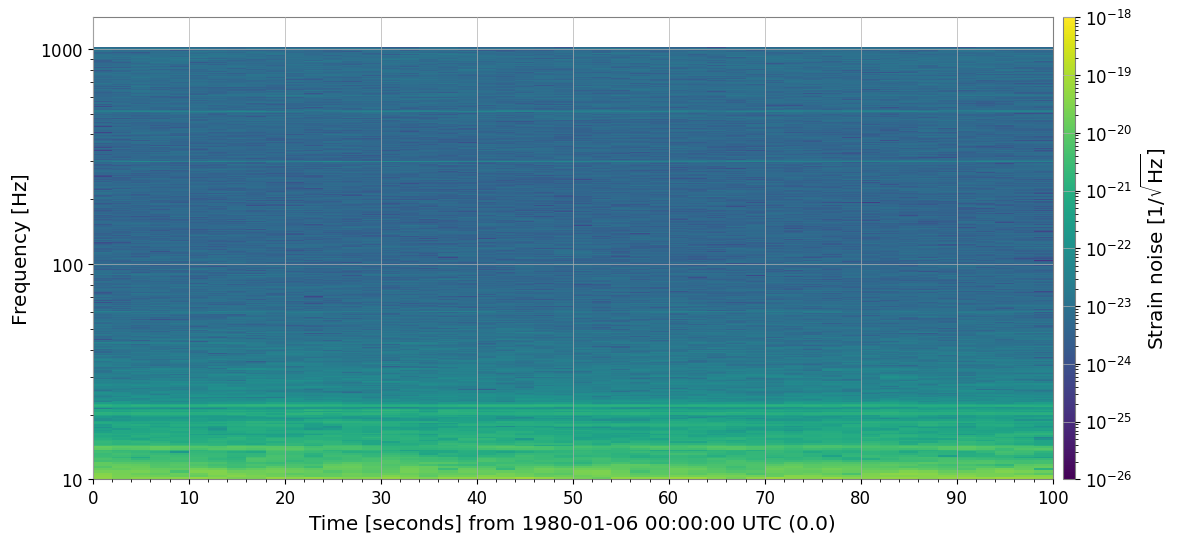

In [15]:
specgram = H1_1data.crop(0,100).spectrogram2(fftlength=4, overlap=2, window='hann') ** (1/2.)
plot = specgram.plot()
print(specgram.min(), specgram.max())

ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(10, 1400)
ax.colorbar(
    clim=(1e-26, 1e-18),
    norm="log",
    label=r"Strain noise [$1/\sqrt{\mathrm{Hz}}$]",
)
plot

/home/vboxuser/miniforge3/lib/python3.10/site-packages/gwpy/signal/qtransform.py:124: UserWarning: upper frequency of 1024.00 is too high for the given Q range, resetting to 645.53
  warnings.warn('upper frequency of %.2f is too high for the given '


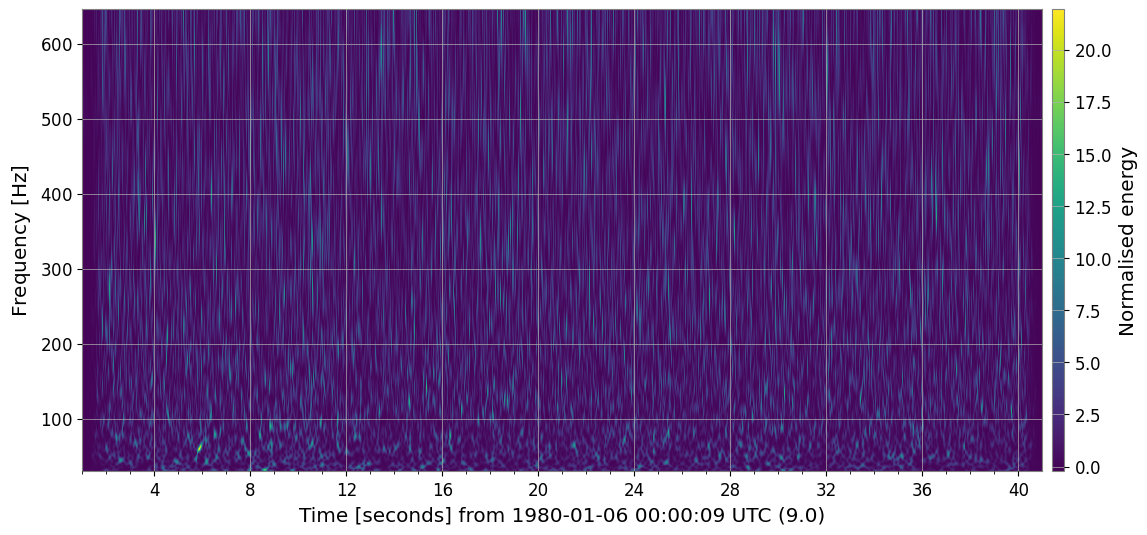

In [22]:
Hq1 = H1_1data.crop(10,50).q_transform(frange=(30, 1024))
plot = Hq1.plot()
plot.colorbar(label="Normalised energy")

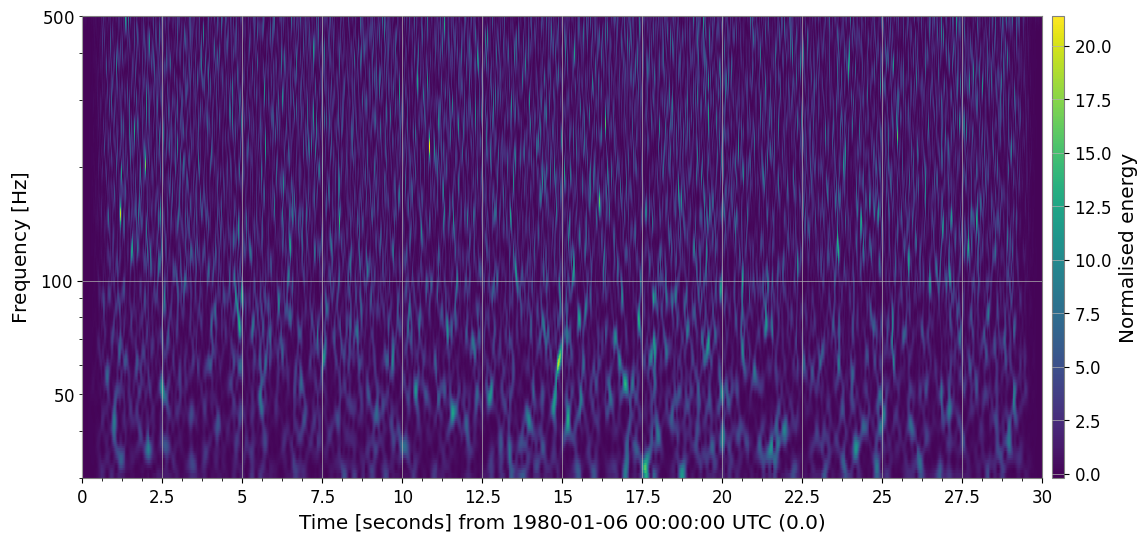

In [18]:
ax = plot.gca()
ax.set_ylim(30, 500)
ax.set_yscale("log")
plot  # refresh

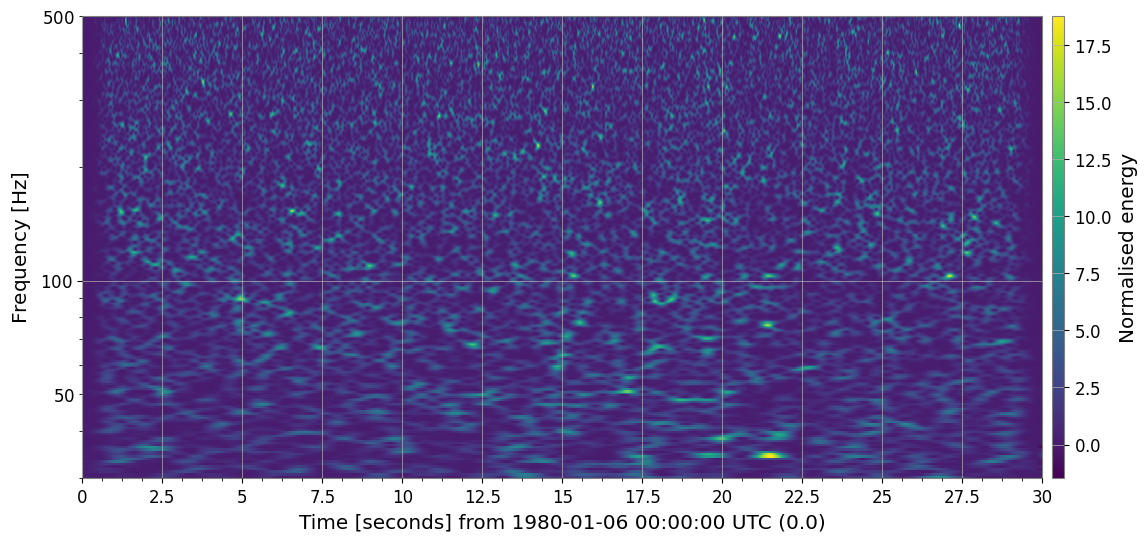

In [19]:
Hq1 = H1_1data.crop(0,30).q_transform(frange=(30, 500), qrange=(100, 110))
plot = Hq1.plot()
ax = plot.gca()
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

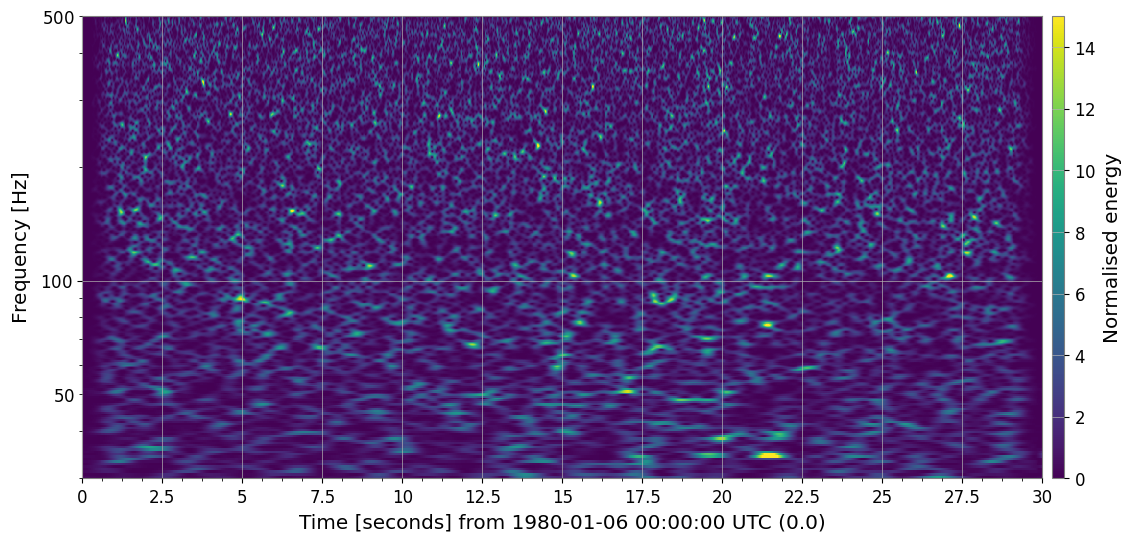

In [20]:
plot.colorbars[0].mappable.set_clim(0,15)
plot.refresh()
plot

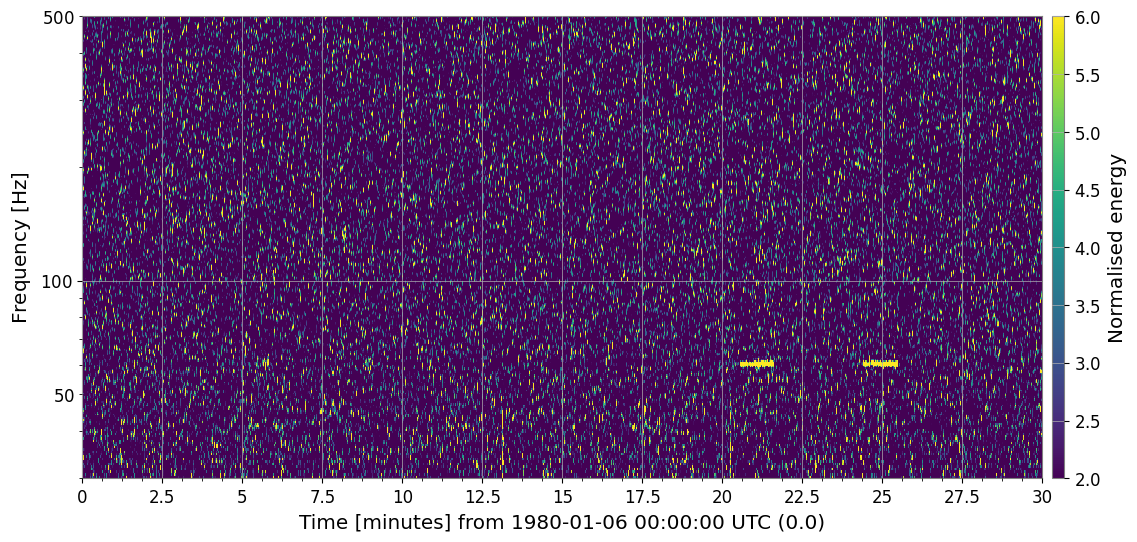

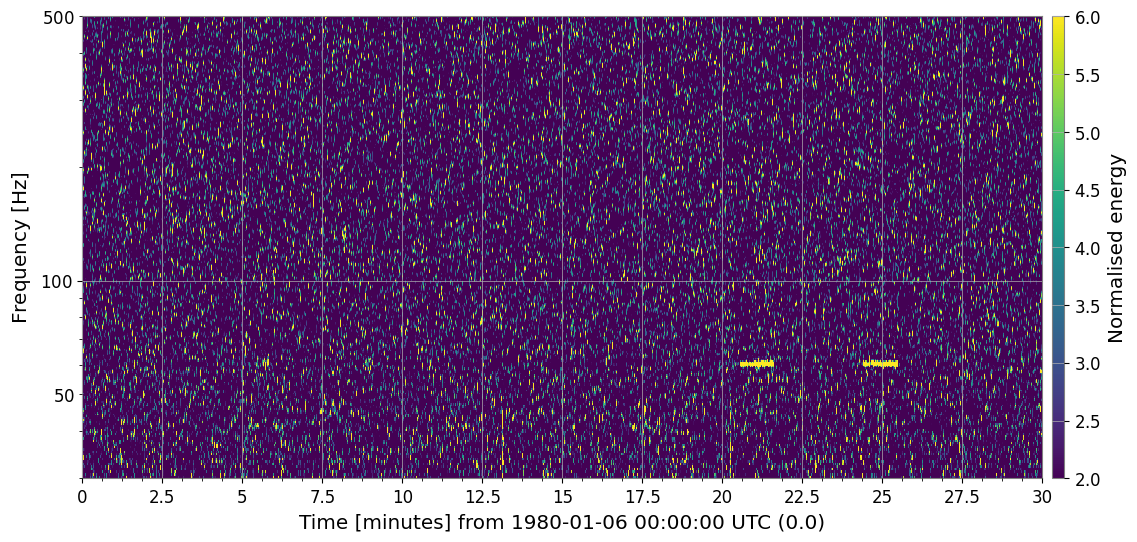

In [8]:
Lq1 = L1_1data.q_transform(frange=(30, 500), qrange=(100, 110))
plot = Lq1.plot()
ax = plot.gca()
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

plot.colorbars[0].mappable.set_clim(2,6)
plot.refresh()
plot